Oasis Infobytes : Data Science Internship

Task-3 : Car Price Prediction with Machine Learning

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.

Car Price Prediction with Machine Learning

Car price prediction using machine learning is a common application of regression algorithms. In order to predict car prices, you would typically need a dataset that includes information about various car features, such as make, model, year, mileage, engine size, fuel type, transmission type, and other relevant characteristics.

Steps to build a machine learning model for car price prediction:

Data Collection: Collect the car data needed to build the machine learning model. This may include scraping websites, purchasing datasets, or collecting data from dealerships.

Data Preparation: Pre-process the data to ensure that it is in a format that can be used for analysis. This includes cleaning the data, removing duplicates, dealing with missing values, and encoding categorical variables.

Feature Selection: Identify which features are most relevant to predicting car prices. We can use techniques such as correlation analysis, feature importance analysis, or domain knowledge to identify the most important features.

Model Selection: Choose a regression algorithm that is best suited for our dataset. 

Model Training: Train the machine learning model on the dataset using the selected algorithm.

Model Evaluation: Evaluate the performance of the model using metrics such as mean squared error (MSE), root mean squared error (RMSE), or R-squared.

In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Processing

In [2]:
# Loading the data from csv file to pandas dataframe
car_data = pd.read_csv("D:\Project\Oasis Infobyte\Task 3 Car Price Prediction\car data.csv")

In [3]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
car_data.shape

(301, 9)

In [9]:
# Checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Encoding the categorical data (Now we will change the text data into numerical data)

In [11]:
# Now we will change the text data into numerical data ... for example take petrol as 0 deisel as 1 and cng as 2

In [12]:
# Encoding Fuel_Type column
car_data.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

# Encoding Seller_Type column
car_data.replace({'Seller_Type': {'Dealer':0,'Individual':1}},inplace = True)

# Encoding Transmission column
car_data.replace({'Transmission': {'Manual':0,'Automatic':1}},inplace = True)

# Inplace True is used to make changes in the original data set

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into training and test data (Our target is "Selling_Price so we remove that column and store it into Y")

In [14]:
X = car_data.drop(['Car_Name','Selling_Price'], axis =1 )
Y = car_data['Selling_Price']

In [15]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [16]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Splitting Training and test data 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1,random_state = 2)
# Test_size = 0.1 means that 10 percent of the data is testing data and 90 percent of the data is training data

# Model Training

1. Linear Regression

In [18]:
# loading the linear regression model
Linear_Regression_Model = LinearRegression()
Linear_Regression_Model.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

Predition on Training data

In [19]:
# Predition on Training data
Training_data_Model_prediction = Linear_Regression_Model.predict(X_train)
Training_data_Model_prediction

array([ 3.73088505e+00,  5.60702081e+00,  7.79779356e+00, -1.88374756e+00,
        6.71614572e+00,  8.14343296e+00,  5.84067525e+00,  6.17919527e+00,
        6.15863751e+00,  1.59459051e+01,  2.15385926e+00,  1.11618544e+00,
       -4.05463414e-01,  6.69051516e+00,  6.81961414e+00,  1.02957394e+00,
        6.74306974e+00,  1.43864300e+01,  3.00001893e+00,  7.95149024e+00,
       -8.38569413e-01,  9.02067892e+00,  1.21210550e+00,  2.20040027e+00,
       -8.23744275e-01,  7.52651502e-01,  1.00142469e+01, -4.08950275e-01,
       -2.40418357e+00,  9.99845989e+00,  6.81867179e+00,  1.09249928e+00,
        4.36158792e+00,  9.20660480e-02,  3.48993776e+00,  2.78147834e+00,
        1.50401026e+00,  4.65736158e-01,  1.68679810e+00,  1.18722506e+00,
        4.32936153e+00,  6.09932798e+00,  9.51639926e-01,  7.52875828e-01,
        6.05967594e+00,  3.49453005e+00,  2.40969246e+00,  7.52230513e+00,
        4.63113915e+00,  4.44239322e+00,  4.22460259e+00,  2.71077171e+00,
        4.46881874e+00,  

In [20]:
# R squared error
error_score = metrics.r2_score(Y_train,Training_data_Model_prediction)
print("R squared error : ",error_score)

R squared error :  0.8799451660493708


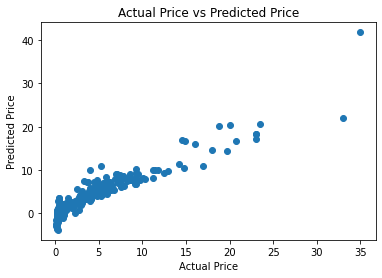

In [21]:
# Visualize the actual prices and predicted prices
plt.scatter(Y_train,Training_data_Model_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on Testing data

In [22]:
Test_data_Model_prediction = Linear_Regression_Model.predict(X_test)
Test_data_Model_prediction


array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [23]:
# R squared error 
error_score = metrics.r2_score(Y_test,Test_data_Model_prediction)
print("R squared error : ", error_score)

R squared error :  0.8365766715026374


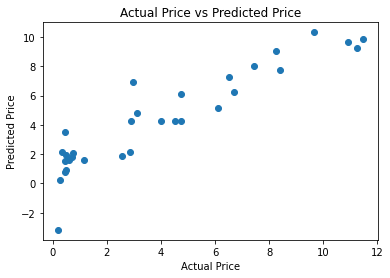

In [24]:
plt.scatter(Y_test,Test_data_Model_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

2. Lasso Regression Model

In [25]:
# loading the linear regression model
Lasso_Regression_Model = Lasso()
Lasso_Regression_Model.fit(X_train, Y_train)

Lasso()

# Model Evaluation


Prediction on Training data

In [26]:
# Prediction on Training data
Training_data_Model_prediction_lasso = Lasso_Regression_Model.predict(X_train)
Training_data_Model_prediction_lasso

array([ 3.56679076e+00,  5.60257564e+00,  8.28781371e+00, -8.30814314e-01,
        5.27539880e+00,  6.50367937e+00,  5.73552938e+00,  6.41187200e+00,
        4.78218845e+00,  1.54979701e+01,  2.60868685e+00,  1.68164537e+00,
        4.65587149e-01,  5.14260426e+00,  6.87569869e+00,  1.60372469e+00,
        5.30299396e+00,  1.39150016e+01,  2.86877663e+00,  6.44421824e+00,
        9.38523430e-02,  9.99955865e+00,  1.79683394e+00,  2.66121014e+00,
        2.10269105e-02,  1.39327221e+00,  1.01152846e+01,  4.55985698e-01,
       -1.29850564e+00,  8.96458834e+00,  6.87473286e+00,  2.80689227e+00,
        4.00679563e+00,  8.93707044e-01,  3.11243615e+00,  2.61344453e+00,
        2.13519495e+00,  1.21115483e+00,  2.20395877e+00,  1.77253883e+00,
        4.40123646e+00,  4.26379158e+00,  1.53108120e+00,  2.67410546e+00,
        4.37186991e+00,  2.41613935e+00,  2.90706331e+00,  6.07491388e+00,
        5.02364608e+00,  4.39669701e+00,  3.59203190e+00,  2.67643327e+00,
        4.41172590e+00,  

In [27]:
# R squared error
error_score = metrics.r2_score(Y_train,Training_data_Model_prediction_lasso)
print("R squared error : ",error_score)

R squared error :  0.8427856123435794


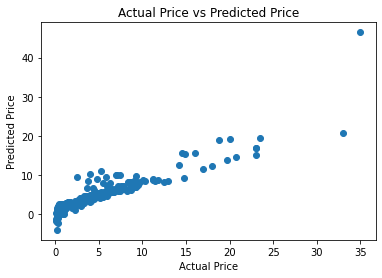

In [28]:
# Visualize the actual prices and predicted prices
plt.scatter(Y_train,Training_data_Model_prediction_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on Testing data

In [29]:
# Prediction on Testing data
Test_data_Model_prediction_lasso = Lasso_Regression_Model.predict(X_test)
Test_data_Model_prediction_lasso

array([ 9.87888122,  1.42396266,  4.33267834,  3.17313445,  8.95590579,
        4.29397384,  3.73913632,  5.66283974,  0.91478394,  5.25514316,
        6.47238818,  4.39507335,  1.2955156 ,  8.26559961,  2.00292338,
        2.32529219,  2.55349653,  2.34742172,  7.96895166,  4.18441245,
        2.3369918 ,  7.86598537,  2.02308236,  8.56734786,  1.55498136,
        6.48561097,  2.11427451, -1.18422036,  4.01710445,  2.21749695,
        2.41820898])

In [30]:
# R squared error 
error_score = metrics.r2_score(Y_test,Test_data_Model_prediction_lasso)
print("R squared error : ", error_score)

R squared error :  0.8709167941173195


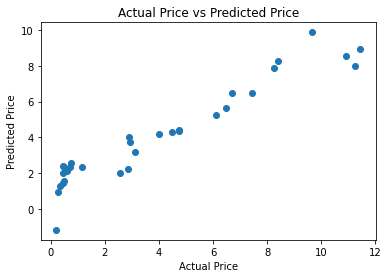

In [31]:
plt.scatter(Y_test,Test_data_Model_prediction_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()